<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   NOME                                  15411 non-null  object 
 1   ORGAO                                 15411 non-null  object 
 2   CARGO                                 15410 non-null  object 
 3   REMUNERACAODOMES                      15411 non-null  float64
 4   FERIASE13oSALARIO                     880 non-null    float64
 5   VANTAGENSEVENTUAIS                    302 non-null    float64
 6   LICENCAPREMIOINDENIZADA               0 non-null      float64
 7   ABONOPERMANENCIAEOUTRAS INDENIZACOES  1 non-null      float64
 8   REDUTORSALARIAL                       5 non-null      float64
 9   TOTALLIQUIDOR                         15407 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame

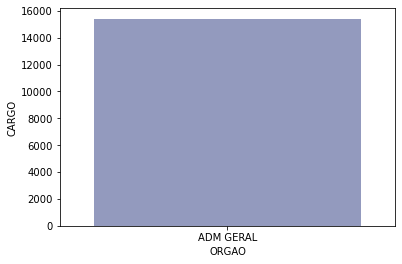

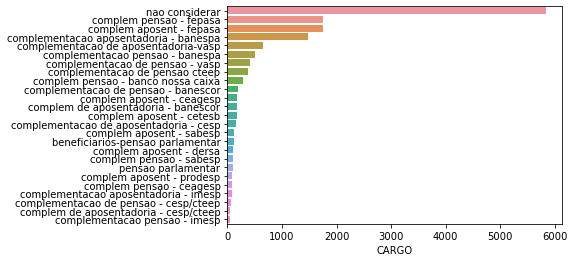

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NOME              15411 non-null  int64  
 1   ORGAO             15411 non-null  int64  
 2   CARGO             15411 non-null  int64  
 3   REMUNERACAODOMES  15411 non-null  float64
 4   TOTALLIQUIDOR     15407 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 602.1 KB
trilho de precisao ->  0.8219993518646018
trilho de testes  ->  0.8219993518646018


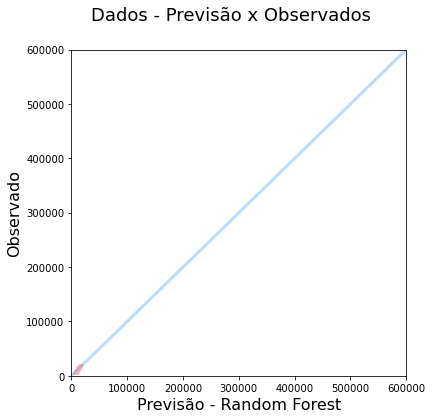

In [54]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import random
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor


# Lendo o arquivo - tive alguns erros para ler o arquivo .csv e por este motivo eu acabei salvando no formato excel e não tive mais problemas
salariossp = pd.read_excel('/Users/felipe.santos/Downloads/remuneracaoSP-excel.xls')

# Abaixo estou executando comandos para entender melhor as informações que estão contidas na planilha
salariossp.info()
salariossp.head()
# Eu tive alguns problemas para manipular as colunas numericas do arquivo e por este motivo acabei executando o script abaixo para transformar em colunas numericas com o panda
for col in ['REMUNERACAODOMES', 'TOTALLIQUIDOR']:
    salaries[col] = pd.to_numeric(salaries[col], errors='coerce')

# no meu caso para simplificar eu resolvi trabalhar apenas com os valores de remuneração mensal e total liquido , por este motivo removi as demais colunas que eu nao iria utilizar, com o comando abaixo
salariossp = salariossp.drop('FERIASE13oSALARIO', axis=1)
salariossp = salariossp.drop('VANTAGENSEVENTUAIS', axis=1)
salariossp = salariossp.drop('LICENCAPREMIOINDENIZADA', axis=1)
salariossp = salariossp.drop('REDUTORSALARIAL', axis=1)
salariossp = salariossp.drop('ABONOPERMANENCIAEOUTRAS INDENIZACOES', axis=1)


# como o cargo era um objeto para conseguir apresentar ele nos graficos eu tive que executar o comando abaixo para conververter a coluna cargo em string
salariossp['CARGO'] = salariossp['CARGO'].astype(str)
salariossp.info()



# nos itens abaixo eu estou explorando um pouco algumas informações da planilha e plotando em graficos 

#relação orgao X quantidade de linhas de cargos na planilha
salariossp_groupby_cargo=salaries.groupby('ORGAO')
salariossp_groupby_cargo.describe()
sns.barplot(x='ORGAO', y='CARGO', palette="BuPu",data=salaries_groupby_gender.count().reset_index())
plt.show()


#grafico que apresenta uma lista dos 25 cargos 
salariossp['CARGO'] = salariossp['CARGO'].apply(str.lower)
jobcount = salariossp['CARGO'].value_counts()[:25]
sns.barplot(x=jobcount, y=jobcount.keys())
plt.show()    




#codigo para realizar o treinamento 


#no caso abaixo estou convertendo string em codigo , como estou utilizando o relacionamento de cargo orgao e nome que são strings eu acabei transformando para implementar o modelo
from sklearn.preprocessing import LabelEncoder
encoderJobTitle = LabelEncoder()
salariossp["CARGO"] = encoderJobTitle.fit_transform(salariossp["CARGO"] )
salariossp.head()

encodergender= LabelEncoder()
salariossp["ORGAO"] = encoderJobTitle.fit_transform(salaries["ORGAO"] )
salariossp.head(20)


encodergendertest= LabelEncoder()
salariossp["NOME"] = encoderJobTitle.fit_transform(salaries["NOME"] )
salariossp.info()



#implementando o modelo de floresta 

#definindo as variaveis de treino e teste neste caso abaixo eu estou treinando informações de pessoa ( cargo, orgao e nome) comparando com o salario mensal  ( remuneracaomes). 
X_test = salariossp[["CARGO", "ORGAO", "NOME"]]
X_train = salariossp[["CARGO", "ORGAO","NOME"]]
X_train.head()

y_test = salariossp["REMUNERACAODOMES"]
y_train = salariossp["REMUNERACAODOMES"]
y_train.head()

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

accuracy_train = clf.score(X_train, y_train)
accuracy_test = clf.score(X_test, y_test)

print("trilho de precisao -> ", accuracy_train)
print("trilho de testes  -> ", accuracy_test)

#abaixo estou criando um grafico para apresentar os resultados do treinamento
plt.figure(figsize=(6,6))
plt.scatter(pred_test, y_test, color='#FEBFB3', s = 0.2)
plt.xlim(-50,600000)
plt.ylim(-50, 600000)
plt.plot([-50, 600000], [-50, 600000], color='#007bff44', linestyle='-', linewidth=3)
plt.suptitle('Dados - Previsão x Observados ', fontsize=18)
plt.xlabel('Previsão - Random Forest', fontsize = 16)
plt.ylabel('Observado', fontsize=16)
plt.show()
